In [1]:
from AdaptiveKLLE import * 
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, homogeneity_completeness_v_measure
from sklearn.manifold import LocallyLinearEmbedding

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
X = data['data']
y = data['target']

In [3]:
#Using default parameters of sklearn implementation

lle = LocallyLinearEmbedding(random_state=0)
embs_ll = lle.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(embs_ll)
lab_lle = kmeans.labels_

print(adjusted_rand_score(y, lab_lle))
print(homogeneity_completeness_v_measure(y, lab_lle))

/Users/federico.ravenda/anaconda3/envs/LLE/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.5637510205230709
(0.5879164116696249, 0.9202400768446993, 0.7174643320814477)


# Adaptive LLE

In [4]:
r = 'opt'
Dthr = 6.667

k_star_lle = K_starLLE(X = X, initial_id = None, n_iter = 10)
Y_kstar_lle, W_lle, kstars = k_star_lle.calculate_embedding(initial_id=None, Dthr=Dthr, r = r)

iteration  0
id  [3.21]
iteration  1
id  [2.72]
iteration  2
id  [2.63]
iteration  3
id  [2.58]
iteration  4
id  [2.55]
iteration  5
id  [2.56]
iteration  6
id  [2.56]
iteration  7
id  [2.57]
iteration  8
id  [2.55]
iteration  9
id  [2.56]


/Users/federico.ravenda/anaconda3/envs/LLE/lib/python3.10/site-packages/dadapy/_utils/utils.py:150: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(
/Users/federico.ravenda/anaconda3/envs/LLE/lib/python3.10/site-packages/dadapy/id_estimation.py:185: RuntimeWarning: divide by zero encountered in divide
  mus = self.distances[:, 2] / self.distances[:, 1]


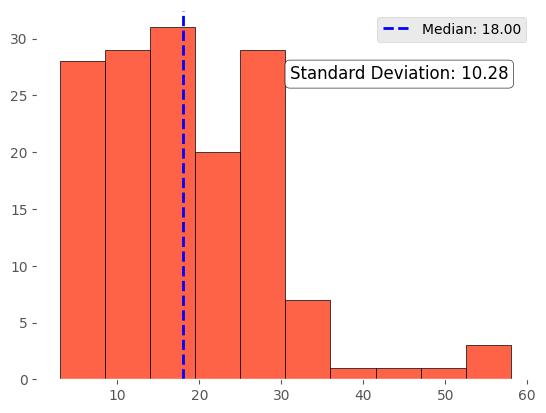

In [5]:
median_value = np.median(kstars)
std_dev = np.std(kstars)


fig, ax = plt.subplots()
fig.patch.set_facecolor('white') 
ax.set_facecolor('white')  

ax.hist(kstars, edgecolor='black', color = 'tomato')
ax.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.8)
ax.text(0.95, 0.85, f'Standard Deviation: {std_dev:.2f}', transform=ax.transAxes,
        fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=bbox_props)

ax.legend()
plt.show()

In [6]:
np.mean(kstars)

18.406666666666666

In [7]:
sc = KMeans(n_clusters=3, random_state=0)
sc.fit(Y_kstar_lle)
lab_kstar = sc.labels_
ari_horizontal = adjusted_rand_score(y, lab_kstar)
hcv_horizontal = homogeneity_completeness_v_measure(y, lab_kstar)
print(adjusted_rand_score(y, lab_kstar))
print(homogeneity_completeness_v_measure(y, lab_kstar))

0.833982948121967
(0.8166619294590487, 0.8167610624629106, 0.8167114929527716)


/Users/federico.ravenda/anaconda3/envs/LLE/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
n_neighbors = [5, 10, 15, 18, 20, 25, 30, 35, 40, 45, 50]
ari_kmeans = []
hcv_kmeans =[]
for NN in n_neighbors: 
    lle = LocallyLinearEmbedding(random_state=0, n_components=3, n_neighbors=NN, n_jobs=-1)
    embs_ll = lle.fit_transform(X)
    kmeans = KMeans(n_clusters=3, random_state=0)
    kmeans.fit(embs_ll)
    lab_lle = kmeans.labels_
    ari_kmeans.append(adjusted_rand_score(y, lab_lle))
    hcv_kmeans.append(list(homogeneity_completeness_v_measure(y, lab_lle)))

/Users/federico.ravenda/anaconda3/envs/LLE/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/federico.ravenda/anaconda3/envs/LLE/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/federico.ravenda/anaconda3/envs/LLE/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/federico.ravenda/anaconda3/envs/LLE/lib/python3.10/site-packages/sklearn/cluster/

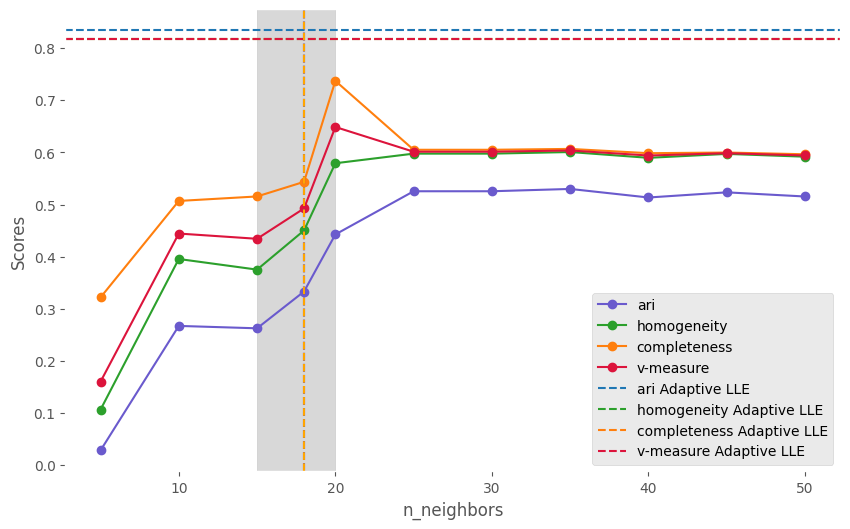

In [9]:
ari_color = '#1f77b4'
completeness_color = '#ff7f0e'
homogeneity_color = '#2ca02c'
vmeasure_color = 'crimson'

plt.figure(figsize=(10, 6))

plt.plot(n_neighbors, ari_kmeans, label='ari', marker='o', color='slateblue')

hcv_kmeans = np.array(hcv_kmeans)
plt.plot(n_neighbors, hcv_kmeans[:, 0], label='homogeneity', marker='o', color=homogeneity_color)
plt.plot(n_neighbors, hcv_kmeans[:, 1], label='completeness', marker='o', color=completeness_color)
plt.plot(n_neighbors, hcv_kmeans[:, 2], label='v-measure', marker='o', color=vmeasure_color)

plt.axhline(y=ari_horizontal, color=ari_color, linestyle='--', label='ari Adaptive LLE')
plt.axhline(y=hcv_horizontal[0], color=homogeneity_color, linestyle='--', label='homogeneity Adaptive LLE')
plt.axhline(y=hcv_horizontal[1], color=completeness_color, linestyle='--', label='completeness Adaptive LLE')
plt.axhline(y=hcv_horizontal[2], color=vmeasure_color, linestyle='--', label='v-measure Adaptive LLE')

plt.axvline(x=18, color='blue', linestyle='--')
plt.axvline(x=18, color='orange', linestyle='--')

plt.axvspan(15, 20, color='gray', alpha=0.3)

plt.title('')
plt.xlabel('n_neighbors')
plt.ylabel('Scores')
plt.legend(loc='lower right')

plt.gca().set_facecolor('white')

plt.grid(True)
plt.savefig('plot_iris_LLE.pdf')
plt.show()